<a href="https://colab.research.google.com/github/yoshimelaine/autoencoder_example/blob/master/AE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**install conda and rdkit**

In [1]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')


--2020-07-29 04:31:45--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M   196MB/s    in 0.4s    

2020-07-29 04:31:46 (196 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: / done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=py37h7b64

**importing libraries**

In [3]:
import numpy as np
import h5py
import json
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole

**importing modules**

In [2]:
!pip install import_ipynb

  Created wheel for import-ipynb: filename=import_ipynb-0.1.3-py3-none-any.whl size=2975 sha256=ff41954fd74af8cab1d8e1feaeb2d03580847ee243ab5093a1e33a853d0e0240
  Stored in directory: /root/.cache/pip/wheels/b1/5e/dc/79780689896a056199b0b9f24471e3ee184fbd816df355d5f0
Successfully built import-ipynb


In [4]:
import import_ipynb
import model
import utils

importing Jupyter notebook from model.ipynb


Using TensorFlow backend.


importing Jupyter notebook from utils.ipynb
--2020-07-29 04:43:50--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh.1’

Miniconda3-py37_4.8 100%[===================>]  81.12M   174MB/s    in 0.5s    

2020-07-29 04:43:51 (174 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh.1’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: / - \ | / - \ | done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0


In [5]:
from model import MoleculeVAE
from utils import encode_smiles, decode_latent_molecule, interpolate, get_unique_mols

In [6]:
latent_dim = 292

In [7]:
trained_model = 'chembl_23_model.h5'

Loading model

In [8]:
charset_file = 'charset.json'
with open(charset_file, 'r') as outfile:
  charset = json.load(outfile)

In [9]:
model = MoleculeVAE()
model.load(charset, trained_model, latent_rep_size = latent_dim)

Encoding the chosen molecule (aspirin) into a latent representation

In [10]:
aspirin_smiles = 'CC(=O)Oc1ccccc1C(=O)O'
aspirin_latent = encode_smiles(aspirin_smiles, model, charset)
aspirin_latent

array([[ 0.01385829, -0.06603067,  0.0006574 ,  0.05903336, -0.01160424,
         0.0559628 , -0.00905276, -0.0266309 ,  0.07358522, -0.01003369,
         0.06209587,  0.10456652, -0.02902898, -0.05352604, -0.00761117,
         0.04602552, -0.01951202, -0.01104968,  0.01958213,  0.09608544,
         0.00038748, -0.10627203,  0.02423274,  0.08652393,  0.05171505,
        -0.01954885,  0.13509409, -0.09777597, -0.15294477, -0.00370322,
        -0.06875177,  0.0252041 ,  0.01017252, -0.07342604, -0.01924022,
        -0.01047576, -0.00540272,  0.10609733,  0.02664194,  0.06181047,
        -0.06714211,  0.07040848, -0.053007  , -0.05127917, -0.05860339,
        -0.06468524, -0.0667915 , -0.01737866, -0.10745563,  0.06593148,
        -0.07594666,  0.04204043,  0.02588456,  0.09413978, -0.03805646,
         0.07589978,  0.06488924,  0.04976916, -0.06226026,  0.02510488,
        -0.01707768,  0.02666069, -0.15758851,  0.01716068, -0.0242204 ,
         0.09366106, -0.00844098, -0.05698497, -0.0

Reconstructing from latent space

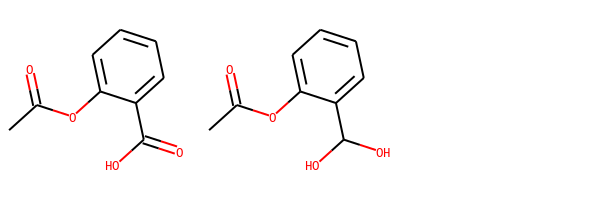

In [11]:
reconstructed_aspirin = decode_latent_molecule(aspirin_latent, model, charset, latent_dim)
original = Chem.MolFromSmiles(aspirin_smiles)
reconstructued = Chem.MolFromSmiles(reconstructed_aspirin)

Draw.MolsToGridImage([original, reconstructued])

In [12]:
#generate 1000 random 292-dimension continuous arrays with mean=aspirin_latent, stdev = 0.1
stdev = 0.1
latent_mols = stdev * np.random.randn(1000, latent_dim) + aspirin_latent

Decoding the randomly aspirin (arrays) generated from latent space

In [13]:
decoded_molecules = []
for lm in latent_mols:
    decoded_molecules.append(decode_latent_molecule(lm, model, charset, latent_dim))

**Validating the molecules using RDKit**

In [14]:
from rdkit import Chem
from rdkit import RDLogger

# remove warnings and errors from notebook (lots of them due non valid molecule generation)
lg = RDLogger.logger()
lg.setLevel(RDLogger.CRITICAL)

working_mols = []
for smiles in decoded_molecules:
    try:
        mol = Chem.MolFromSmiles(smiles)
        if mol:
            working_mols.append(mol)
    except:
        continue

**Visualising the generated molecules**

/usr/local/lib/python3.7/site-packages/rdkit/Chem/Draw/IPythonConsole.py:188: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  % (maxMols))


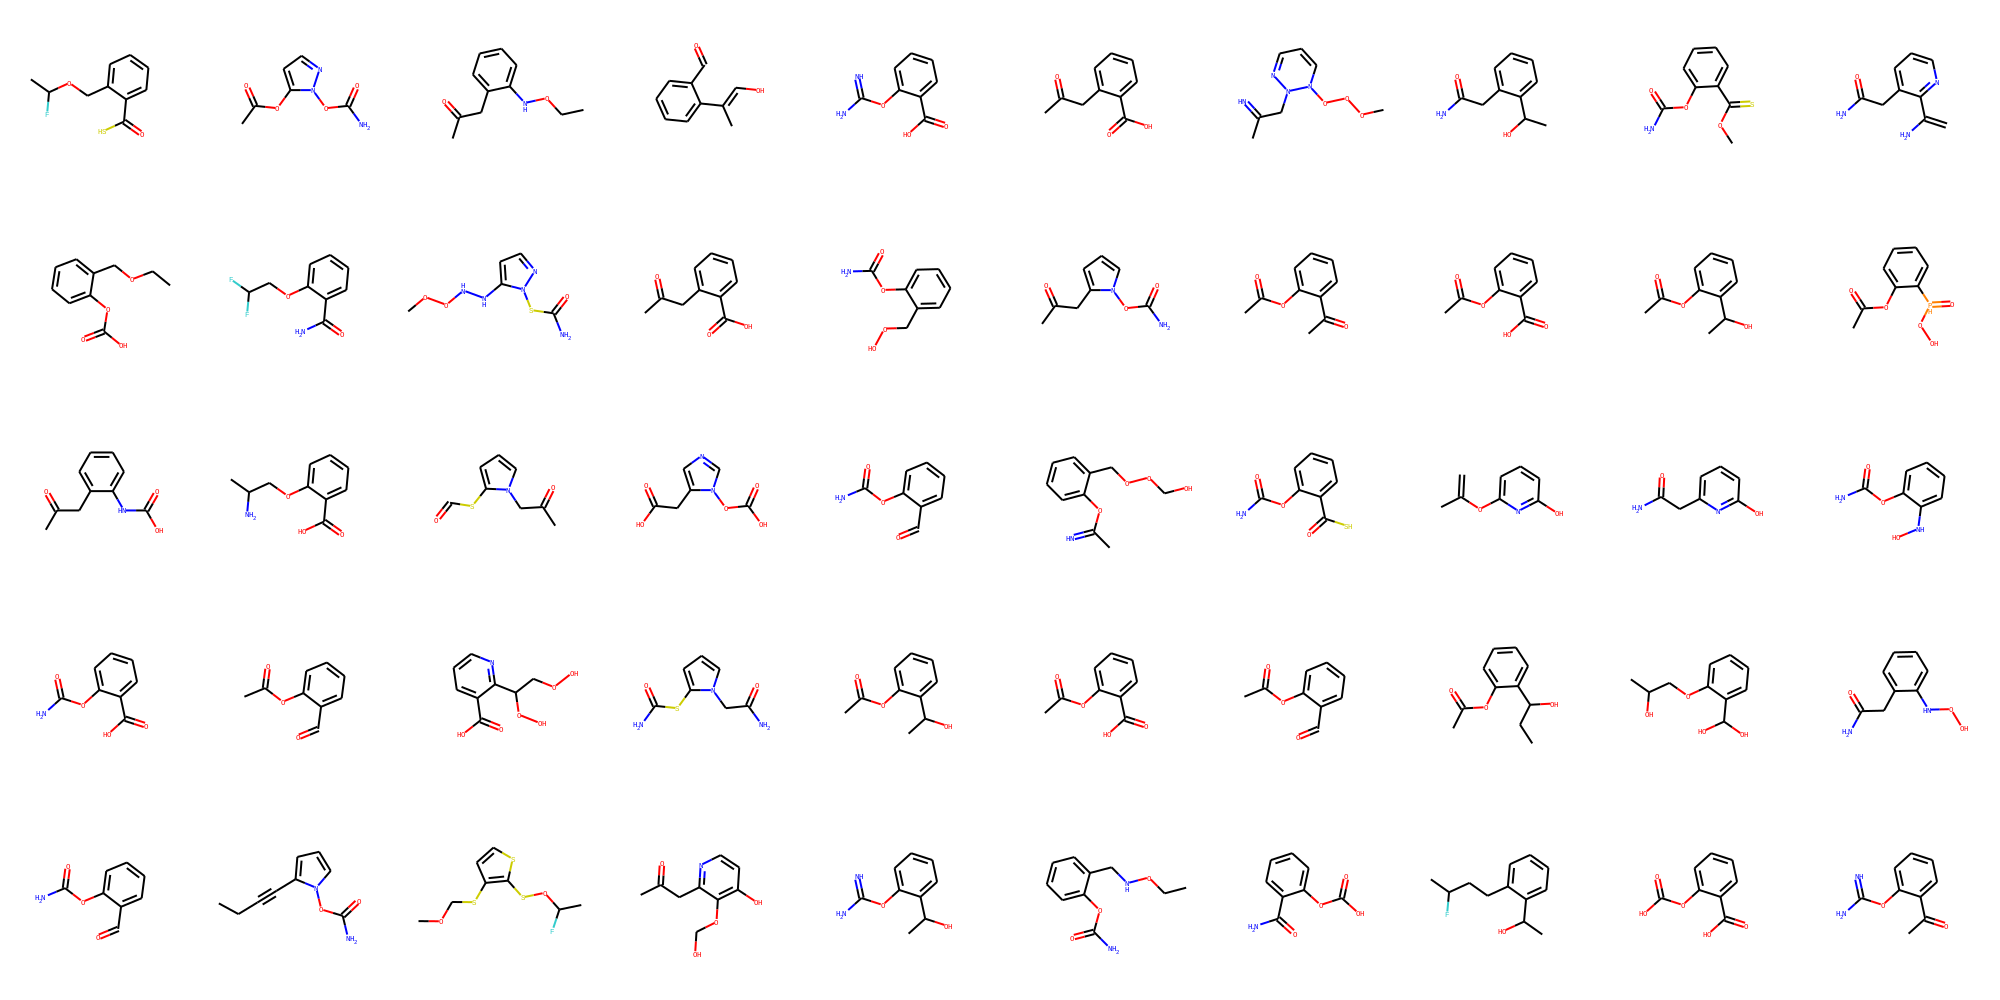

In [15]:
Draw.MolsToGridImage([mol for mol in working_mols], molsPerRow=10)

Generating unique valid moleculesoutside ChEMBL.
This means that we can sample the model which is representing the ChEMBL chemical space to retrieve molecules that don't exist in the database.

In [20]:
import requests

url = 'https://www.ebi.ac.uk/unichem/rest/inchikey/{}'

unique_mols = get_unique_mols(working_mols)

in_unichem = []
for um in unique_mols:
    res = requests.get(url.format(um[1]))
    if res.status_code == 200:
        in_unichem.append([um[0], res.json()])

not_in_chembl = filter(lambda mol: 1 not in [int(res['src_id']) for res in mol[1]], in_unichem)

rdkit valid mols:124
unique molecules:105
found in unichem:22


In [23]:
print('rdkit valid mols:'+str(len(working_mols)))
print('unique molecules:'+str(len(unique_mols)))
print('found in unichem:'+str(len(in_unichem)))
#print(len(not_in_chembl))

rdkit valid mols:124
unique molecules:105
found in unichem:22


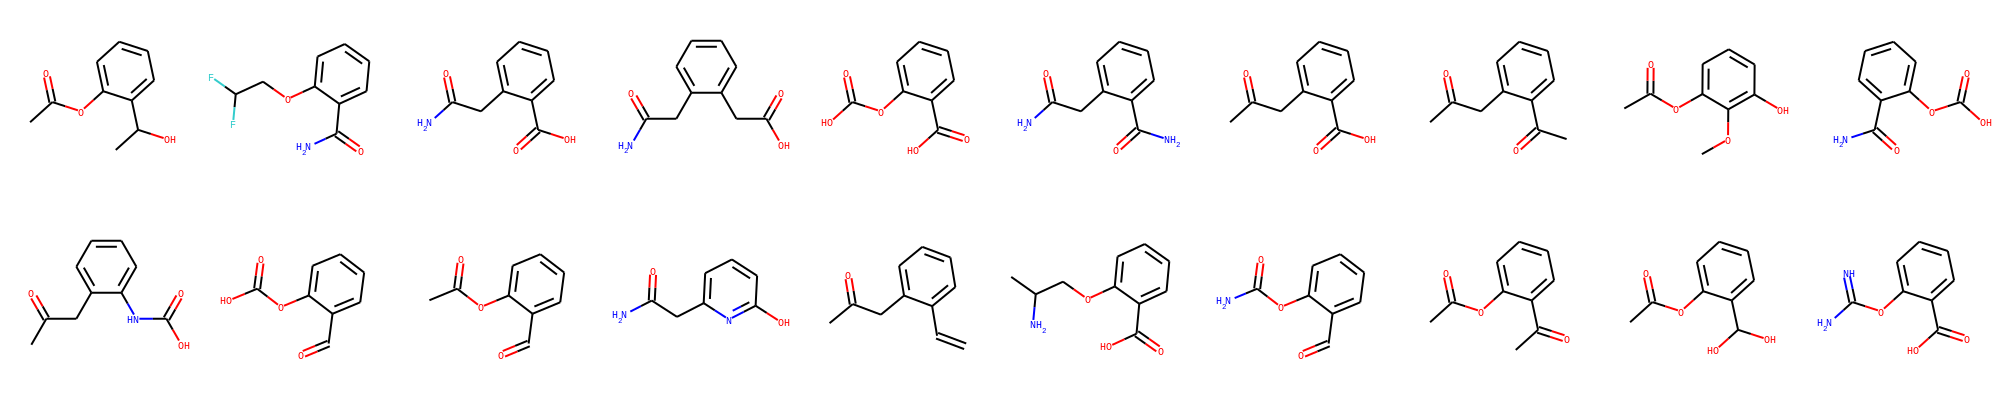

In [24]:
Draw.MolsToGridImage([mol[0] for mol in not_in_chembl], molsPerRow=10)

Interpolation of two molecules

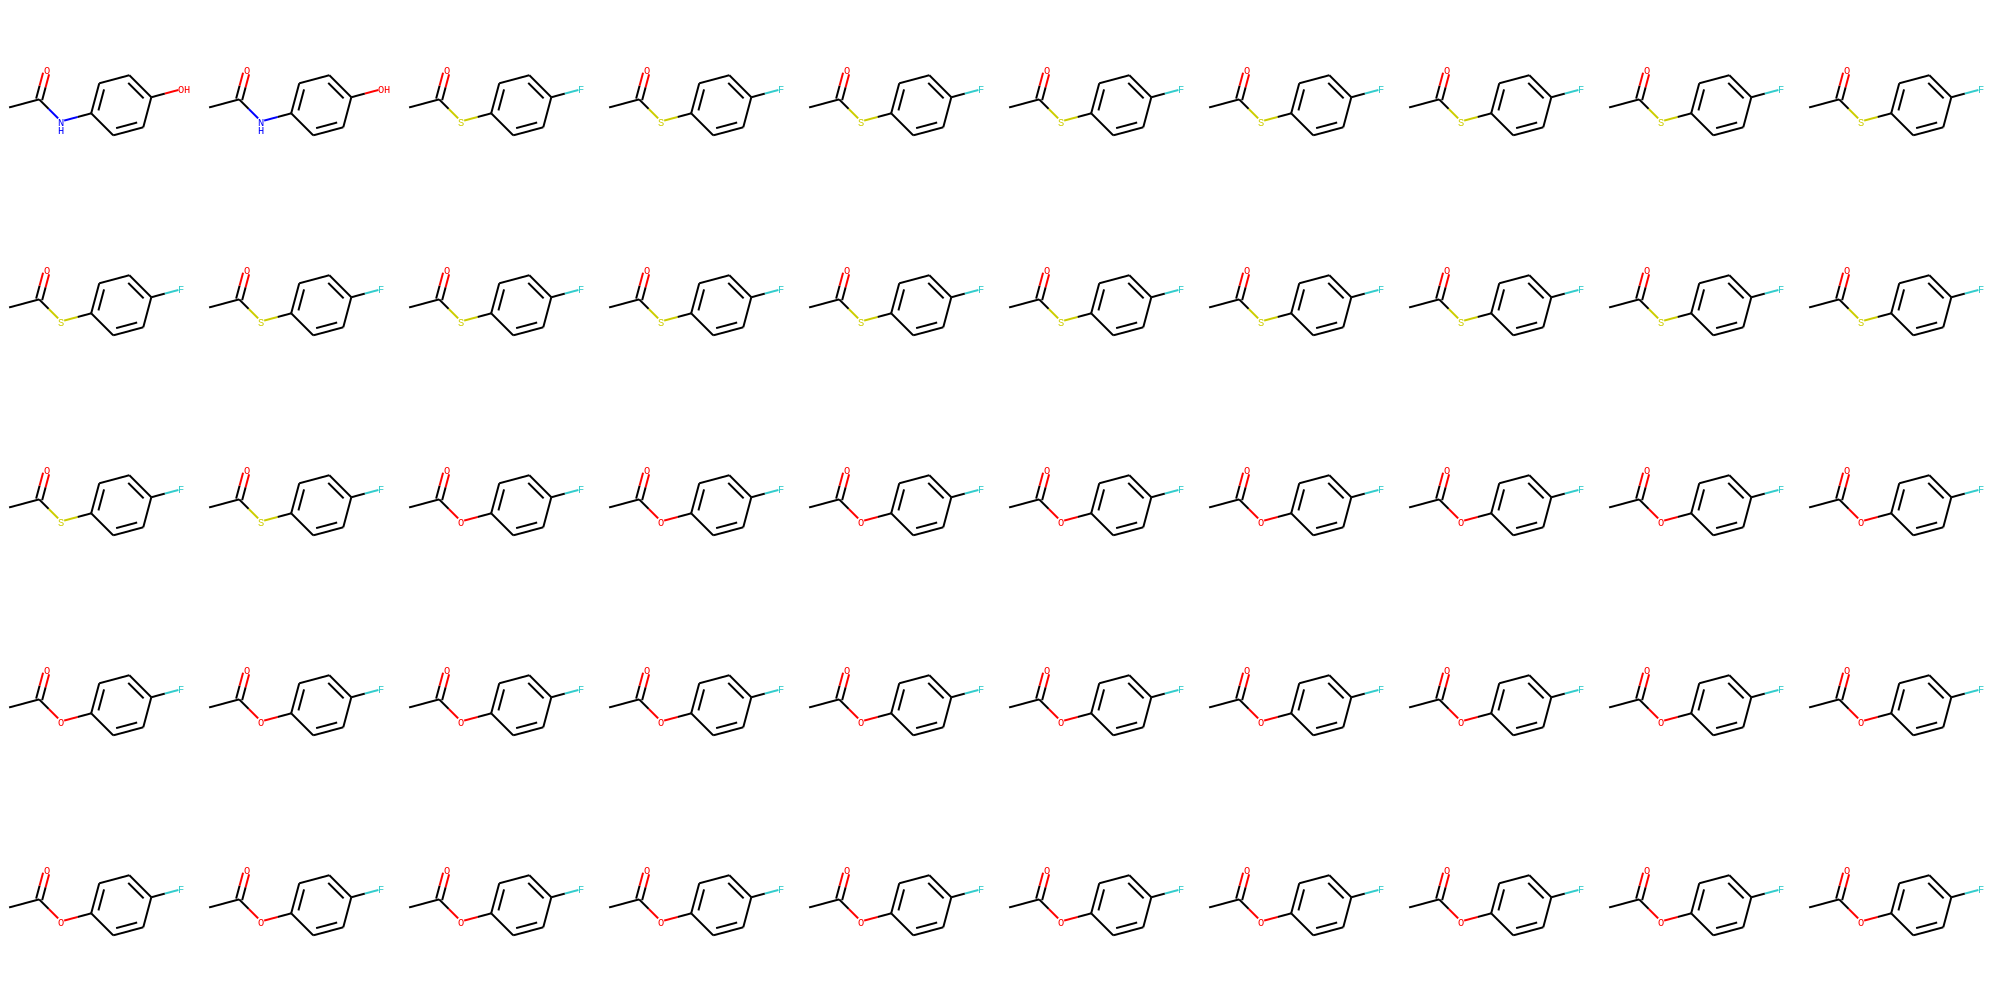

In [25]:
paracetamol_smiles = 'CC(=O)Nc1ccc(O)cc1'
celecoxib_smiles = 'Cc1ccc(cc1)c2cc(nn2c3ccc(cc3)S(=O)(=O)N)C(F)(F)F'

steps = 300
results = interpolate(paracetamol_smiles, celecoxib_smiles, steps, charset, model, latent_dim)
    
working_results = []
for smiles in results:
    try:
        mol = Chem.MolFromSmiles(smiles)
        if mol:
            working_results.append(mol)
    except:
        continue
                
Draw.MolsToGridImage(working_results, molsPerRow=10)